In [3]:
!pip install numpy pandas pillow matplotlib scikit-image
import numpy as np
import pandas as pd
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from skimage import io
import math

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached networkx-3.2.1-py3-none-any.whl.metadata (5.2 kB)
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ------------- -------------------------- 3.9/11.6 MB 21.3 MB/s eta 0:00:01
   ------------------ --------------------- 5.5/11.6 MB 13.4 MB/s eta 0:00:01
   ---------------------------------- ----- 10.0/11.6 MB 15.9 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 16.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 29.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ------------------------------ --------- 6.0/7.8 MB 30.7 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 28.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   --------------------------- ------------ 8.9/

### 1. We know that speech signal is one dimensional vector. Different vector transformations can be applied on the speech signal to enhance its quality. Explore the following vector transformations on the speech signal.

1. Record your voice signal for 30 seconds (speak slow and record) and play it in python.

In [4]:
!pip install sounddevice

In [8]:
import sounddevice as sd
!pip install soundfile

  Using cached soundfile-0.12.1-py2.py3-none-win_amd64.whl.metadata (14 kB)
Using cached soundfile-0.12.1-py2.py3-none-win_amd64.whl (1.0 MB)


In [11]:
import sounddevice as sd
import soundfile as sf

fs = 16000  # Sample rate
duration = 30  # Duration in seconds
print("Recording...")
speech_signal = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='float64')
sd.wait()
print("Recording complete!")

# Ensure the recorded audio has the correct shape
if len(speech_signal.shape) == 1:
    speech_signal = speech_signal[:, None]

sf.write('speech_signal.wav', speech_signal, fs)

Recording...
Recording complete!


In [13]:
# Print the shape of the signal
print("Shape of the recorded signal:", speech_signal.shape)

Shape of the recorded signal: (480000, 1)


In [15]:
import soundfile as sf

# Load the audio file
speech_signal, fs = sf.read('speech_signal.wav')

# Ensure the loaded audio has the correct shape
if len(speech_signal.shape) == 1:
    speech_signal = speech_signal[:, None]

# Save the loaded audio back to a file
sf.write('speech_signal.wav', speech_signal, fs)

print("Audio loaded and saved successfully!")


Audio loaded and saved successfully!


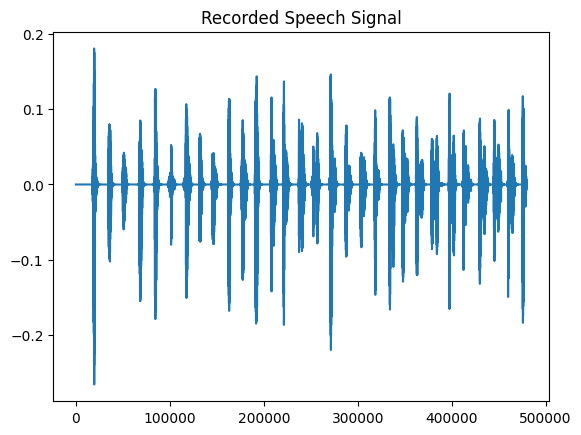

In [16]:
# Plot the entire signal
plt.plot(speech_signal)
plt.title("Recorded Speech Signal")
plt.show()

2. Print the shape of the signal. Is it a 1D vector ?

In [17]:
print("My voice recording shape:", speech_signal.shape)
print('It is an one dimensional (1-D) vector')

My voice recording shape: (480000, 1)
It is an one dimensional (1-D) vector


3. Plot the signal. Can u able to roughly tell how many words/sentences spoken?

30 words were actually spoken and the visualization also shows 30 words


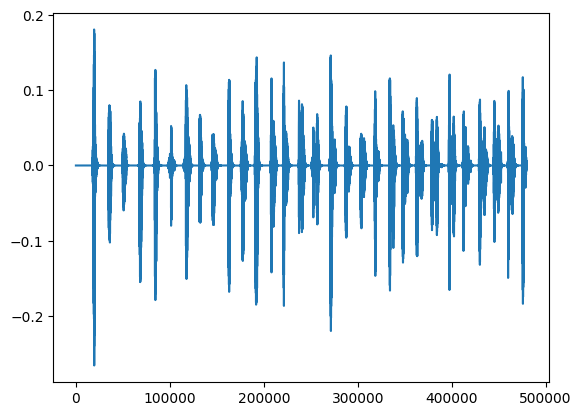

In [18]:
plt.plot(speech_signal)
print('30 words were actually spoken and the visualization also shows 30 words')

4. Take only the first 15 seconds of your speech signal

In [19]:
trim_record = speech_signal[:fs*15]
sd.play(trim_record,fs)

5. Down sample the speech vector by 2 (Pick one sample for every two sample)

In [20]:
sd.play(speech_signal,4000)

6. Upsample the speech vector by 2 (Introduce one sample newly between every two sample)

In [21]:
sd.play(speech_signal,16000)

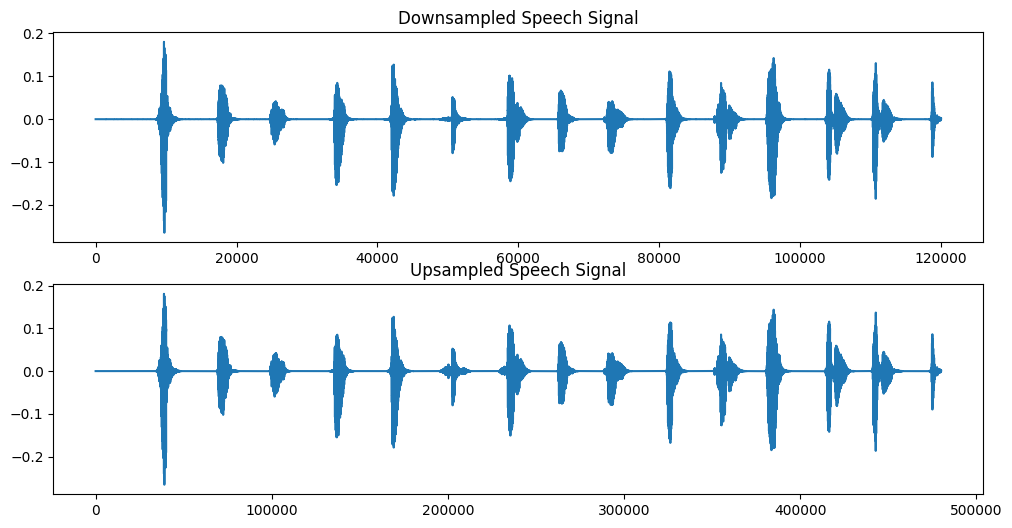

In [24]:
from scipy import signal


# Extract first 15 seconds of the signal
speech_signal_15 = speech_signal[:int(15 * fs)]
# Downsample by a factor of 2
downsampled_signal = signal.decimate(speech_signal_15.flatten(), 2)

# Upsample by a factor of 2
upsampled_signal = np.repeat(speech_signal_15.flatten(), 2)

# Plot the downsampled and upsampled signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(downsampled_signal)
plt.title("Downsampled Speech Signal")

plt.subplot(2, 1, 2)
plt.plot(upsampled_signal)
plt.title("Upsampled Speech Signal")
plt.show()

7. Apply the following transformations on the speech signal and try to hear to

a. 3*Speech signal

In [25]:
vr1 = 3 * speech_signal
sd.play(vr1,fs)

b. 0.5*Speech signal

In [27]:
vr2 = 0.5 * speech_signal
sd.play(vr2,fs)

c. exp(0.5*speech signal)

In [28]:
vr3 = [math.exp(x) for x in speech_signal]
sd.play(vr3,fs)

C:\Users\achitrarajasekaran\AppData\Local\Temp\ipykernel_35792\3530044035.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  vr3 = [math.exp(x) for x in speech_signal]


d. ln(speech signal)

In [32]:
vr4 = np.log(speech_signal_15.flatten() + 1e-6)
# Normalize the transformed signal to the range -1.0 to 1.0
vr4 = (vr4 - np.min(vr4)) / (np.max(vr4) - np.min(vr4)) * 2 - 1

# Play the normalized signal
sd.play(vr4, fs)
sd.wait()  # Wait until the audio is done playing
sd.play(vr4, fs)

C:\Users\achitrarajasekaran\AppData\Local\Temp\ipykernel_35792\456879347.py:1: RuntimeWarning: invalid value encountered in log
  vr4 = np.log(speech_signal_15.flatten() + 1e-6)


e. Cos (Speech Signal)

In [33]:
vr5 = [math.cos(x) for x in speech_signal]
sd.play(vr5,fs)

C:\Users\achitrarajasekaran\AppData\Local\Temp\ipykernel_35792\3963595908.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  vr5 = [math.cos(x) for x in speech_signal]


f. Speech signal + normal_random_noise of same length of speech signal

In [37]:
random_noise = np.random.random([480000, 1])

vr6 = speech_signal + random_noise
sd.play(vr6,fs)

C:\Users\achitrarajasekaran\AppData\Local\Temp\ipykernel_35792\3787961776.py:6: RuntimeWarning: invalid value encountered in log
  "ln(signal)": np.log(speech_signal.flatten() + 1e-6),  # Adding small value to avoid log(0)


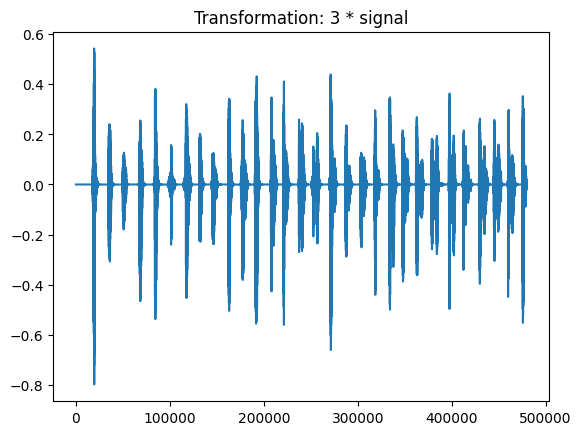

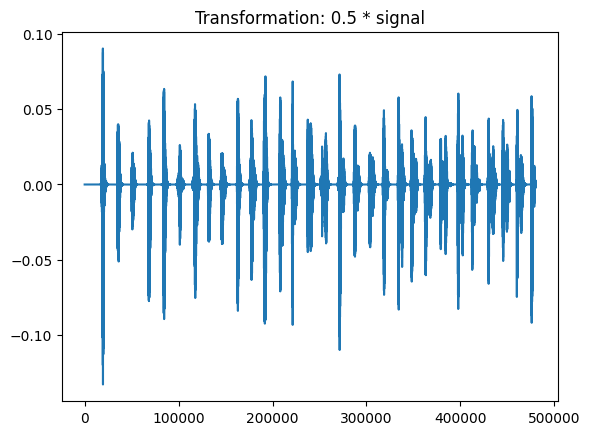

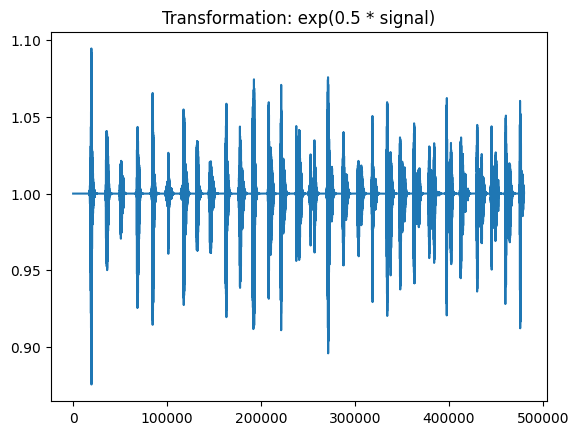

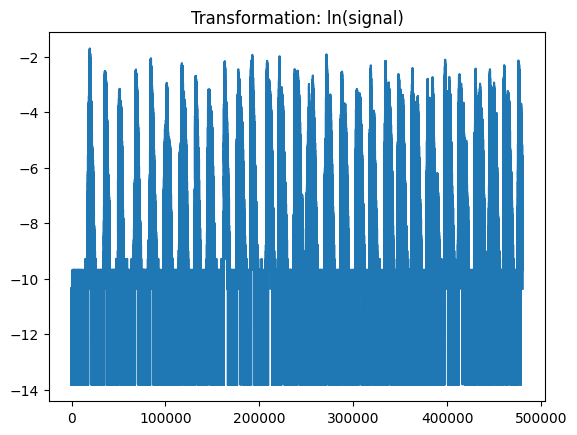

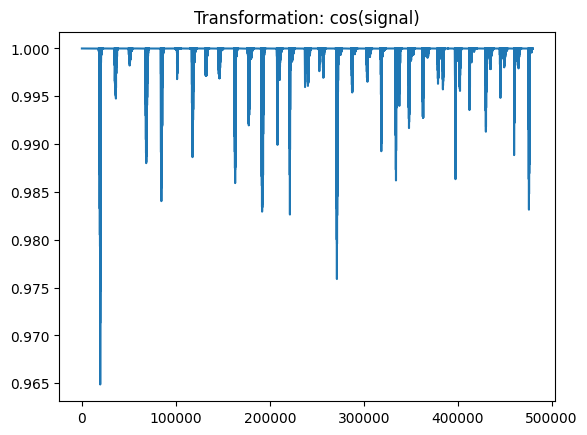

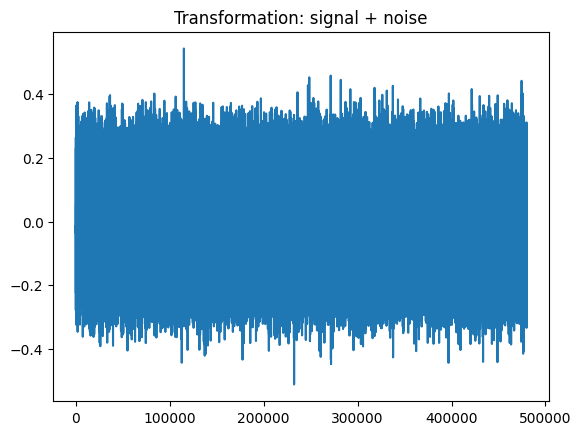

In [40]:
# Perform the transformations
transformations = {
    "3 * signal": 3 * speech_signal.flatten(),
    "0.5 * signal": 0.5 * speech_signal.flatten(),
    "exp(0.5 * signal)": np.exp(0.5 * speech_signal.flatten()),
    "ln(signal)": np.log(speech_signal.flatten() + 1e-6),  # Adding small value to avoid log(0)
    "cos(signal)": np.cos(speech_signal.flatten()),
    "signal + noise": speech_signal.flatten() + np.random.normal(0, 0.1, speech_signal.flatten().shape)
}

# Plot transformed signals
for key, transformed_signal in transformations.items():
    plt.plot(transformed_signal)
    plt.title(f"Transformation: {key}")
    plt.show()

### 2. We know that image is a 2D data, which is nothing but a matrix. Apply different matrix transformations on the following image.

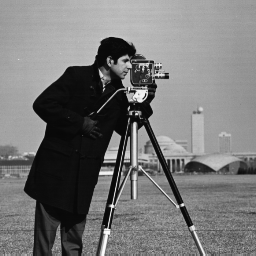

In [43]:
img = Image.open('cameraman.png')
img

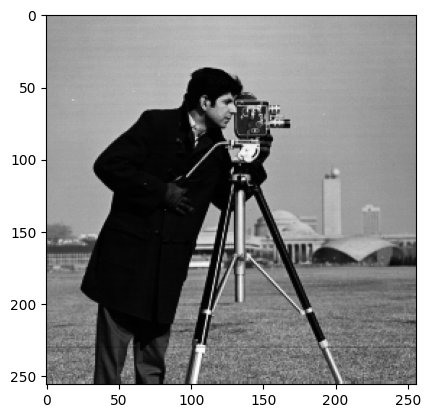

In [44]:
imgarr = plt.imread('cameraman.png')
imgarr

plt.imshow(imgarr, cmap='gray')

1.	Is the cameraman coat have any packets in it ? Apply different transformations on this image to visually prove the answer for this question.

2 Pockets are visible in the cameraman's coat


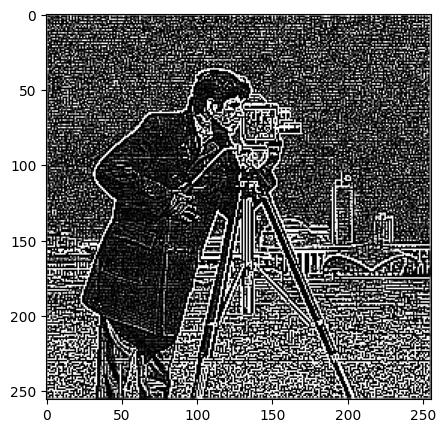

In [45]:
img = Image.open('cameraman.png')

enhance = img.filter(ImageFilter.EDGE_ENHANCE_MORE)

edge = enhance.filter(ImageFilter.FIND_EDGES)
edge

plt.figure(figsize=(5,5))
plt.imshow(edge, cmap='gray')
print("2 Pockets are visible in the cameraman's coat")

2.	Create the negative version of this image

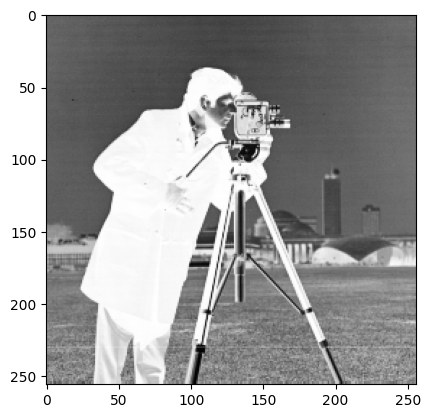

In [46]:
img = Image.open('cameraman.png')

img_neg = 255 - imgarr
plt.imshow(img_neg, cmap='gray')

3.	Rotate the image by an angles 45deg, 90 deg.

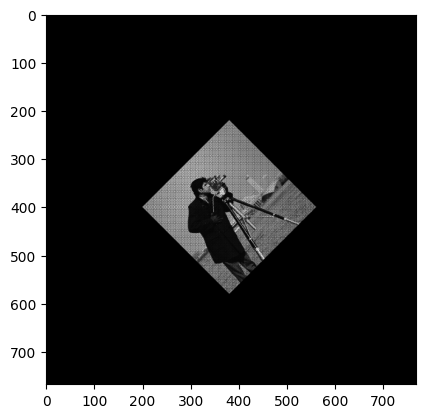

In [47]:
img = io.imread('cameraman.png')

def get_rotation(angle):
    angle = np.radians(angle)
    return np.array([
        [np.cos(angle), -np.sin(angle), 0],
        [np.sin(angle),  np.cos(angle), 0],
        [0, 0, 1]
    ])

img_trans = np.zeros((img.shape[0]*3, img.shape[1]*3), dtype=np.uint8)

R45 = get_rotation(45)

for i, row in enumerate(img):
    for j, col in enumerate(row):
        pixel_data = img[i, j]
        input_coords = np.array([i, j,1])
        i_out, j_out, _ = np.dot(R45,input_coords).astype(int)
        img_trans[i_out+400, j_out+200] = pixel_data

plt.imshow(img_trans, cmap='gray')

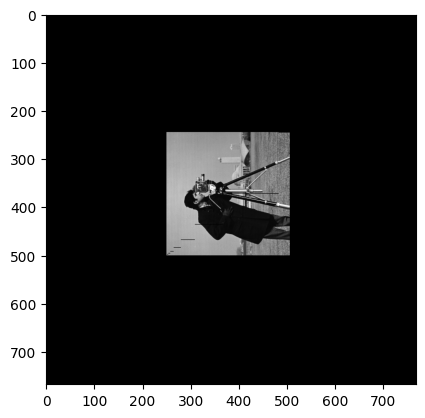

In [48]:
img = io.imread('cameraman.png')

def get_rotation(angle):
    angle = np.radians(angle)
    return np.array([
        [np.cos(angle), -np.sin(angle), 0],
        [np.sin(angle),  np.cos(angle), 0],
        [0, 0, 1]
    ])

img_trans = np.zeros((img.shape[0]*3, img.shape[1]*3), dtype=np.uint8)

R90 = get_rotation(90)

for i, row in enumerate(img):
    for j, col in enumerate(row):
        pixel_data = img[i, j]
        input_coords = np.array([i, j,1])
        i_out, j_out, _ = np.dot(R90,input_coords).astype(int)
        img_trans[i_out+500, j_out+250] = pixel_data

plt.imshow(img_trans, cmap='gray')

4.	Horizontally flip the image

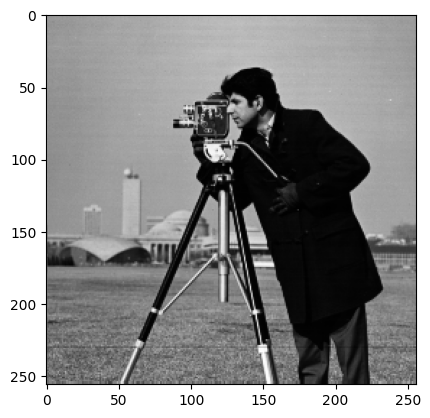

In [49]:
img = io.imread('cameraman.png')

img_trans = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

R_hflip = np.array([[1,0,0],[0,-1,0],[0,0,1]])

for i, row in enumerate(img):
    for j, col in enumerate(row):
        pixel_data = img[i, j]
        input_coords = np.array([i, j,1])
        i_out, j_out, _ = np.dot(R_hflip,input_coords).astype(int)
        img_trans[i_out, j_out] = pixel_data

plt.imshow(img_trans, cmap='gray')

5.	Zoom out the image using any matrix interpolation (up-sampling)

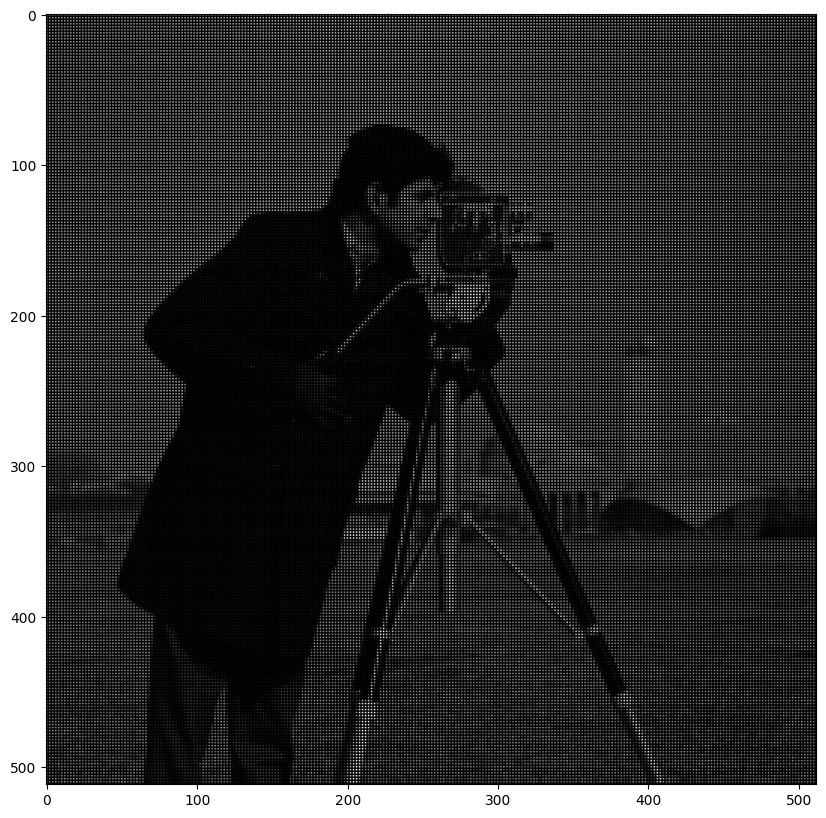

In [50]:
img = io.imread('cameraman.png')

img_trans = np.zeros((img.shape[0]*2, img.shape[1]*2), dtype=np.uint8)

zoom = np.array([[2,0,0],[0,2,0],[0,0,1]])

for i, row in enumerate(img):
    for j, col in enumerate(row):
        pixel_data = img[i, j]
        input_coords = np.array([i, j,1])
        i_out, j_out, _ = np.dot(zoom,input_coords)
        img_trans[i_out, j_out] = pixel_data

plt.figure(figsize=(10, 10))
plt.imshow(img_trans, cmap='gray')

### 3. Lung_Feat.csv is a dataset of features extracted from the lung nodules(tumors). Refer the below article to understand about these features and its extraction process from CT scan.  https://www.scielo.br/j/babt/a/GCTFby9bSBLsynRm44hZYNB/?lang=en

This data consist of 24 columns, in which the first 23 columns are defining the tumor shape and texture characteristics. Apply the dimensionality reduction technique to derive the new fewer feature components to represent the original tumor characteristics without losing more than 5 percent of information. Also list the top 5 features in the first five principle components.

In [53]:
!pip install scikit-learn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------- ----------------------- 4.5/11.0 MB 24.4 MB/s eta 0:00:01
   -------------------------------------- - 10.7/11.0 MB 29.2 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 25.5 MB/s eta 0:00:00


In [54]:
df1 = pd.read_csv('Lung_Feat.csv')
df1

,Area,diameter,perimeter,circularity,homogeneity,compactness,homogeneity.1,3d bounding box dim rate,compactness2,clbp mean,...,energy,skew inside,kurtosis inside,moment 2,MIP,moment 5,moment 6,moment 7,x-y plane bb rate,T
0,61.875000,12.000000,32.077140,0.755673,449.718750,1.345392,1.000000,0.758333,2.339759,14.650000,...,10.149219,0.462735,3.076589,238.764450,276.318695,65971.18750,1.575287e+07,3.681973e+05,19.111872,NON-CANCEROUS
1,14.062500,7.500000,16.749615,0.629887,56.306250,1.615692,0.900000,0.693333,2.105107,7.850000,...,5.401159,0.182834,1.547886,313.565430,318.816223,99969.98438,3.134799e+07,1.327357e+04,19.048378,NON-CANCEROUS
2,11.812500,15.750000,13.560380,0.807250,127.968750,1.574249,0.333333,0.333333,3.415881,11.400000,...,5.017380,0.095425,1.444559,331.105621,275.847107,91334.75781,3.024172e+07,1.102121e+04,19.080124,NON-CANCEROUS
3,20.250000,9.750000,21.604931,0.545166,258.862500,1.529404,0.923077,0.494505,3.196538,15.316667,...,4.719527,-0.396786,1.803046,196.050644,245.214554,48072.80469,9.425374e+06,2.239375e+04,19.111872,NON-CANCEROUS
4,13.500000,11.250000,15.744046,0.684401,127.237500,1.334365,0.866667,0.693333,3.898952,13.400000,...,5.003018,-0.555117,2.040902,315.546234,252.875107,79794.33594,2.517971e+07,1.348662e+04,19.080124,NON-CANCEROUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,140.155313,26.060625,54.991102,0.418325,1632.380344,1.415204,0.516768,0.394122,2.624082,23.701750,...,2.595602,0.077089,1.968552,147.351006,187.634361,32620.65571,5.673153e+06,9.594963e+05,8.043876,CANCEROUS
951,97.250625,17.797500,54.577535,0.294682,875.684672,1.466552,0.635625,0.635625,7.674249,28.009875,...,6.997040,-0.086573,1.845774,133.118939,227.202522,35688.02637,5.609722e+06,1.271180e+06,23.307611,CANCEROUS
952,93.913594,13.348125,34.769701,0.701158,709.595859,1.376667,0.605357,0.559619,1.348210,11.992125,...,1.870938,-0.777520,2.167014,104.375659,148.932374,18343.70713,2.261300e+06,4.971556e+05,9.369557,CANCEROUS
953,25.742812,5.720625,16.605739,0.842614,81.185203,1.192730,0.753333,0.489667,0.934562,4.703625,...,2.028066,-0.449440,1.724977,345.055249,257.867678,104990.73000,4.274701e+07,3.699339e+04,9.701880,CANCEROUS


In [55]:
df_features = df1.drop('T', axis=1)
df_features

,Area,diameter,perimeter,circularity,homogeneity,compactness,homogeneity.1,3d bounding box dim rate,compactness2,clbp mean,...,DC constant,energy,skew inside,kurtosis inside,moment 2,MIP,moment 5,moment 6,moment 7,x-y plane bb rate
0,61.875000,12.000000,32.077140,0.755673,449.718750,1.345392,1.000000,0.758333,2.339759,14.650000,...,1.001611,10.149219,0.462735,3.076589,238.764450,276.318695,65971.18750,1.575287e+07,3.681973e+05,19.111872
1,14.062500,7.500000,16.749615,0.629887,56.306250,1.615692,0.900000,0.693333,2.105107,7.850000,...,1.002350,5.401159,0.182834,1.547886,313.565430,318.816223,99969.98438,3.134799e+07,1.327357e+04,19.048378
2,11.812500,15.750000,13.560380,0.807250,127.968750,1.574249,0.333333,0.333333,3.415881,11.400000,...,1.002419,5.017380,0.095425,1.444559,331.105621,275.847107,91334.75781,3.024172e+07,1.102121e+04,19.080124
3,20.250000,9.750000,21.604931,0.545166,258.862500,1.529404,0.923077,0.494505,3.196538,15.316667,...,1.002237,4.719527,-0.396786,1.803046,196.050644,245.214554,48072.80469,9.425374e+06,2.239375e+04,19.111872
4,13.500000,11.250000,15.744046,0.684401,127.237500,1.334365,0.866667,0.693333,3.898952,13.400000,...,0.980073,5.003018,-0.555117,2.040902,315.546234,252.875107,79794.33594,2.517971e+07,1.348662e+04,19.080124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,140.155313,26.060625,54.991102,0.418325,1632.380344,1.415204,0.516768,0.394122,2.624082,23.701750,...,0.854651,2.595602,0.077089,1.968552,147.351006,187.634361,32620.65571,5.673153e+06,9.594963e+05,8.043876
951,97.250625,17.797500,54.577535,0.294682,875.684672,1.466552,0.635625,0.635625,7.674249,28.009875,...,0.848391,6.997040,-0.086573,1.845774,133.118939,227.202522,35688.02637,5.609722e+06,1.271180e+06,23.307611
952,93.913594,13.348125,34.769701,0.701158,709.595859,1.376667,0.605357,0.559619,1.348210,11.992125,...,0.853556,1.870938,-0.777520,2.167014,104.375659,148.932374,18343.70713,2.261300e+06,4.971556e+05,9.369557
953,25.742812,5.720625,16.605739,0.842614,81.185203,1.192730,0.753333,0.489667,0.934562,4.703625,...,0.853848,2.028066,-0.449440,1.724977,345.055249,257.867678,104990.73000,4.274701e+07,3.699339e+04,9.701880


In [56]:
pca = PCA(n_components=15)

In [57]:
x = StandardScaler().fit_transform(df_features[df_features.columns].values)
pca_result = pca.fit_transform(x)

print("PCA Explained Variance:\n",pca.explained_variance_ratio_)
print("\nCumulative Variance:\n",np.cumsum(pca.explained_variance_ratio_))
print('\n15 PCA components should be good to cover more than 99% of data variance')

PCA Explained Variance:
 [0.34464486 0.17039782 0.11481225 0.08476391 0.06887346 0.0502925
 0.04201717 0.03571407 0.02189207 0.01900879 0.01145486 0.00822359
 0.00778559 0.00614516 0.00461627]

Cumulative Variance:
 [0.34464486 0.51504268 0.62985493 0.71461884 0.7834923  0.8337848
 0.87580198 0.91151604 0.93340811 0.95241691 0.96387177 0.97209535
 0.97988094 0.9860261  0.99064237]

15 PCA components should be good to cover more than 99% of data variance


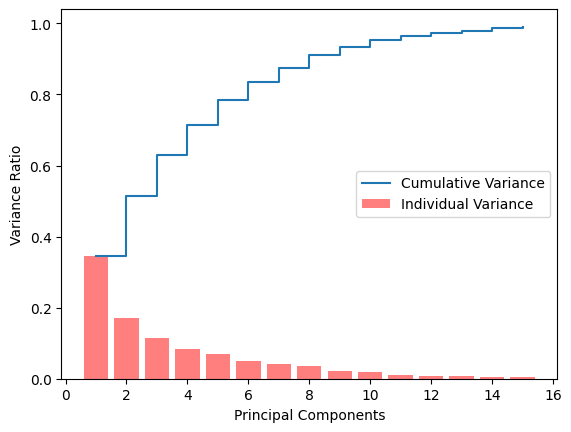

In [58]:
plt.bar(range(1,16), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual Variance', color='red')
plt.step(range(1,16),np.cumsum(pca.explained_variance_ratio_), where= 'post', label='Cumulative Variance')
plt.ylabel('Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'center right')
plt.show()

In [64]:

# Apply PCA to retain 95% of the information
pca = PCA(n_components=0.95)
features_pca = pca.fit_transform(pca_result)

# Find top 5 features in the first five principal components
top_5_features = np.argsort(np.abs(pca.components_), axis=1)[:, :5]
print("Top 5 features for first five principal components:", top_5_features)



Top 5 features for first five principal components: [[10 11  2  1  3]
 [10  0 11  4  7]
 [ 9  0  6 11  4]
 [10  0  9 11  7]
 [ 6 11  7 10  0]
 [13 11 14  0 12]
 [ 1  0  2 14 13]
 [ 0  4  2  9 13]
 [ 0  2 11  5  4]
 [ 3  0  2  6  7]]
